In [1]:
#from solar_data_retrieval import retrieval
import pandas as pd 
import numpy as np
from sys import path
path.append('..')
from solardatatools import plot_2d
from solardataretrieval import utilities
from solardataretrieval.solar_data_retrieval import retrieval
import s3fs

from os.path import expanduser
home = expanduser('~')
with open(home + '/.aws/credentials') as f:
        lns = f.readlines()
        key = lns[3].split(' = ')[1].strip('\n')
        secret = lns[4].split(' = ')[1].strip('\n')

In [2]:
#set variables here: 
#choose how many sites you want in your data pipeline
your_cassandra_cluster_path = '/Users/elpiniki/.aws/cassandra_cluster'
number_of_sites = 1
number_of_days = 1
quantile_percent = 0.95
sorted_days = False

In [3]:
#create data input for dictionary learning 
#this includes the values used for normalization per site 
data_input, quantile_values_list, site_errors, sensors, sites  = retrieval(your_cassandra_cluster_path, number_of_sites, number_of_days, quantile_percent, sorted_days)


getting data from Cassandra - please wait
selection completed
---waiting time: 3.898293972015381 seconds---
191269-3G96-3214_SPR-3000p-TL-1


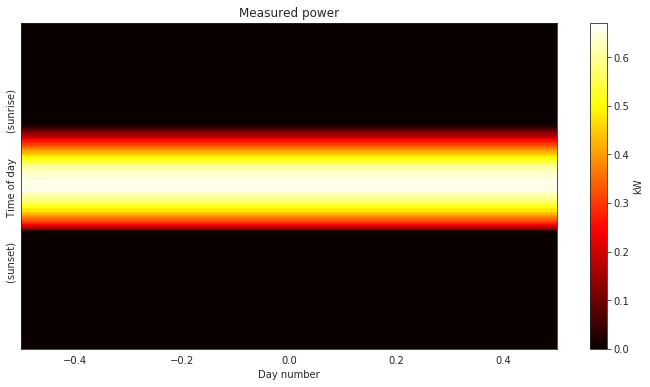

In [4]:
heatmap_site = plot_2d(data_input)

In [11]:
data_input_df = pd.DataFrame(data=data_input[:])
dict = {'site_ID': sites, 'sensor_ID': sensors, 'Quantile_Values': quantile_values_list}
metadata_df = pd.DataFrame(dict)
#dates_selected_df

In [5]:
upload_quantile_values = utilities.AWS_upload(metadata_df,number_of_sites, site_errors, number_of_days, "quantile_values")
upload_data = utilities.AWS_upload(data_input_df,number_of_sites, site_errors, number_of_days, "data_input")

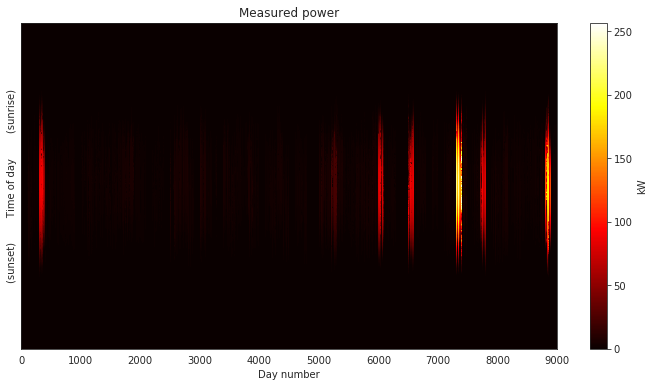

In [6]:
#how to reconstruct the data 
#from solardataretrieval import utilities
number_of_sites_after_erros = int(data_input.shape[1]/number_of_days)
reconstructed_data = utilities.reconstract_data_pipeline(data_input, quantile_values_list, number_of_days, number_of_sites_after_erros)
heatmap_site = plot_2d(reconstructed_data)